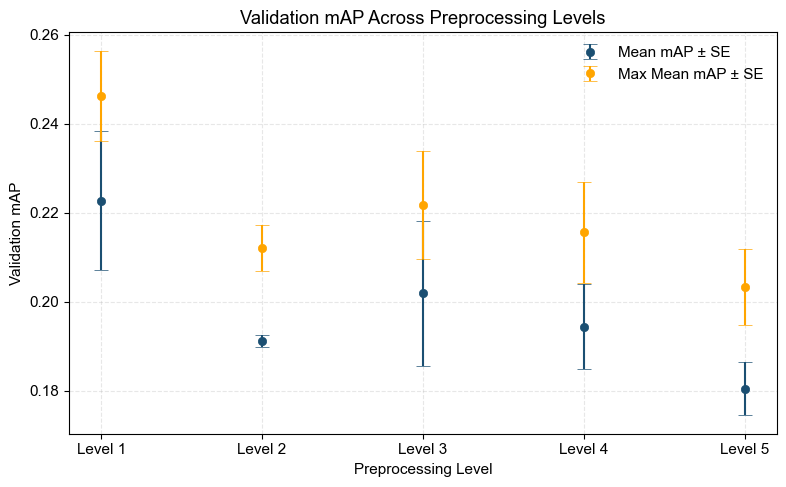

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Font settings for figures (sans-serif preferred for clarity)
plt.rcParams.update({
    "font.family": "Arial",
    "font.size": 11
})

# Color palette
primary_color = '#1B4F72'  # Deep blue

# Data
group1 = [0.23934,0.19166,0.23716]
group2 = [0.18937,0.19360,0.19061]
group3 = [0.19220,0.17993,0.23359]
group4 = [0.20789,0.17607,0.19923]
group5 = [0.17016,0.19104,0.18027]

# max
group1_max = [0.26079,0.22687,0.25134]
group2_max = [0.21109,0.20385,0.22151]
group3_max = [0.20069,0.22213,0.24244]
group4_max = [0.22615,0.19285,0.22782]
group5_max = [0.19107,0.21970,0.19917]

data = [group1, group2, group3, group4, group5]
data_max = [group1_max, group2_max, group3_max, group4_max, group5_max]
x = np.arange(1, len(data) + 1)

# Calculate means and SEs
means = [np.mean(g) for g in data]
ses = [np.std(g, ddof=1) / np.sqrt(len(g)) for g in data]

means_max = [np.mean(g) for g in data_max]
ses_max = [np.std(g, ddof=1) / np.sqrt(len(g)) for g in data_max]

# Create scatter plot with error bars
fig, ax = plt.subplots(figsize=(8, 5))
ax.errorbar(
    x, means, yerr=ses,
    fmt='o',
    color=primary_color,
    ecolor=primary_color,
    elinewidth=1.5,
    capsize=5,
    markersize=6,
    markeredgewidth=0.5,
    label='Mean mAP ± SE'
)
ax.errorbar(
    x, means_max, yerr=ses_max,
    fmt='o',
    color='orange',
    ecolor='orange',
    elinewidth=1.5,
    capsize=5,
    markersize=6,
    markeredgewidth=0.5,
    label='Max Mean mAP ± SE'
)

# Axis settings
ax.set_xticks(x)
ax.set_xticklabels([f'Level {i}' for i in x])
ax.set_xlabel('Preprocessing Level', color='black')
ax.set_ylabel('Validation mAP', color='black')
ax.set_title('Validation mAP Across Preprocessing Levels', color='black')

# Grid and aesthetics
ax.grid(True, linestyle='--', alpha=0.3)
ax.spines[:].set_color('black')  # All borders black
ax.tick_params(colors='black')

# Legend
ax.legend(frameon=False)

plt.tight_layout()
plt.show()


In [2]:
# t test

from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(group4, group3, equal_var=False)  # Welch's t-test recommended
print(f"t={t_stat:.4f}, p={p_val:.4f}")


t=-0.3993, p=0.7146


In [3]:
from scipy.stats import f_oneway

f_stat, p_val = f_oneway(group1, group2, group3, group4, group5)
print(f"ANOVA F={f_stat:.4f}, p={p_val:.4f}")


ANOVA F=1.9586, p=0.1772


None are statistically significant.